## **Lexicon Sentiment Analysis(Unsupervised Type)(Corona_tweets)**

***Most of the NLP problems in actual practice are related to unsupervised learning, which means the label is absent (Positive/Negative). Majority of times companies do not find time to label it manually and hence settle for lexicon based models like Vader. Some, have built their own lexicons related to their field like Retail, News, etc. This notebook demonstrates lexicon based problem tackling.***

## **1. Importing data & libraries**

In [ ]:
#Loading libraries
import numpy as np # provides a high-performance multidimensional array and tools for its manipulation
import pandas as pd # for data munging, it contains manipulation tools designed to make data analysis fast and easy
import re # Regular Expressions - useful for extracting information from text 
import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation
import re

# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

In [ ]:
df = pd.read_csv('Corona_tweets.csv',encoding='latin1')

In [ ]:
df

,User_name,Time,Location,text
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV..."
...,...,...,...,...
41152,41153,14-04-2020,"Wellington City, New Zealand",Airline pilots offering to stock supermarket s...
41153,41154,14-04-2020,NaN,Response to complaint not provided citing COVI...
41154,41155,14-04-2020,NaN,You know itÂs getting tough when @KameronWild...
41155,41156,14-04-2020,NaN,Is it wrong that the smell of hand sanitizer i...


In [ ]:
#Shape of dataframe
print(" Shape of training dataframe: ", df.shape)

 Shape of training dataframe:  (41157, 4)


In [ ]:
# Drop duplicates
df.drop_duplicates()
print(" Shape of dataframe after dropping duplicates: ", df.shape)

 Shape of dataframe after dropping duplicates:  (41157, 4)


In [ ]:
df.isnull().sum()

User_name       0
Time            0
Location     8590
text            0
dtype: int64

In [ ]:
#Null values

null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data)

Null Values in each column:
    column name  Total missing  Percent missing
0     Location           8590         0.208713
1    User_name              0         0.000000
2         Time              0         0.000000
3         text              0         0.000000


## **VADER sentiment analysis**
***Valence Aware Dictionary and sentiment reasoner is a lexicon and rule based sentiment analysis tool which works very well on social media sentiments. It is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.*** 

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.2 MB/s eta 0:00:00


In [ ]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

#Or

#import nltk
#nltk.download('vader_lexicon')
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

#analyser = SentimentIntensityAnalyzer()

In [ ]:
# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [ ]:
#testing the function
tweet  = "I would love to watch the magic show again"
tweet2 = "What the hell they have made. Pathetic!"
tweet3 = " I do not know what to do"  
print (sentiment_analyzer_score(tweet))
print (sentiment_analyzer_score(tweet2))
print (sentiment_analyzer_score(tweet3))

I would love to watch the magic show again {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}
None
What the hell they have made. Pathetic!- {'neg': 0.632, 'neu': 0.368, 'pos': 0.0, 'compound': -0.8622}
None
 I do not know what to do--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None


***Here neg (negative), neu (neutral), and pos (positive) represent the proportion of text falling under each category and this proportion will always sum up to 1 (e.g., 0.656 + 0.344 in first tweet).***

***Compound score is what reflects the overall score. It is sum of all lexicon ratings which is normalized between -1 (most extreme negative) and +1 (most extreme poistive). As per the scoring document (link) it is called as 'normalized, weighted composite score.'***

***The typical thresholds standardized for classifying sentences as positve, negative, neutral are:***

***1) positive sentiment: compound score >= 0.05***

***2) neutral sentiment: (compound score > -0.05) and (compound score < 0.05)***

***3) negative sentiment: compound score <= -0.05***


**Like other preprocessing in text analysis we are not required to remove emojis, slangs (abbreviations), emoticons, punctuations, etc. as VADER generates scores based on these.**

**Some of the important parts are:**

**1) Upper Case (Capitalization)**

***Use of upper case alphabets/words indicate the increase in magnitude of the sentiment. For example, I like the fact that show is over. vs I LIKE the fact that show is over.***

In [ ]:
tweet  = "I like the fact that show is over"
tweet2 = "I LIKE the fact that show is over"

print (sentiment_analyzer_score(tweet))
print (sentiment_analyzer_score(tweet2))

I like the fact that show is over------- {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612}
None
I LIKE the fact that show is over------- {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.4995}
None


***The compound score increases by 13% just by capitalization***

**2) Punctuation**

***Use of punctuation like !, ?, etc. add to the intensity of the text.***

In [ ]:
tweet11  = "What is wrong with you"
tweet22  = "What is wrong with you?"
tweet33 = "What is wrong with you??"

print (sentiment_analyzer_score(tweet11))
print (sentiment_analyzer_score(tweet22))
print (sentiment_analyzer_score(tweet33))

What is wrong with you------------------ {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}
None
What is wrong with you?----------------- {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}
None
What is wrong with you??---------------- {'neg': 0.464, 'neu': 0.536, 'pos': 0.0, 'compound': -0.5362}
None


**3) Conjuctions**

***Conjuctions lead to shift in polarity. The latter part (after the conjuction) acts as dominant part in defining the magnitude of polarity.***

In [ ]:
tweet12  = "He is bad but his mother is good"
tweet23 = "The chicken curry was bad, however ramen was delicious"
tweet34 = "The chicken curry was ok and ramen was delicious"

print (sentiment_analyzer_score(tweet12))
print (sentiment_analyzer_score(tweet23))
print (sentiment_analyzer_score(tweet34))

He is bad but his mother is good-------- {'neg': 0.186, 'neu': 0.496, 'pos': 0.318, 'compound': 0.3818}
None
The chicken curry was bad, however ramen was delicious {'neg': 0.246, 'neu': 0.493, 'pos': 0.261, 'compound': 0.0516}
None
The chicken curry was ok and ramen was delicious {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.7096}
None


**4) Degree modifiers**

***As the name suggests they intensify the degree in positive or negative manner as per the use.***

In [ ]:
tweet13 = "India's game play was good last night."
tweet24 = "India's game play was extremely good last night."
tweet35 = "India's game play was somewhat good last night."
tweet46 = "India's game play was terrible last night."
tweet57 = "India's game play was awfully terrible last night."

print (sentiment_analyzer_score(tweet13))
print (sentiment_analyzer_score(tweet24))
print (sentiment_analyzer_score(tweet35))
print (sentiment_analyzer_score(tweet46))
print (sentiment_analyzer_score(tweet57))

India's game play was good last night.-- {'neg': 0.0, 'neu': 0.485, 'pos': 0.515, 'compound': 0.6486}
None
India's game play was extremely good last night. {'neg': 0.0, 'neu': 0.518, 'pos': 0.482, 'compound': 0.6801}
None
India's game play was somewhat good last night. {'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'compound': 0.6133}
None
India's game play was terrible last night. {'neg': 0.295, 'neu': 0.476, 'pos': 0.229, 'compound': -0.1779}
None
India's game play was awfully terrible last night. {'neg': 0.288, 'neu': 0.509, 'pos': 0.204, 'compound': -0.2484}
None


**5) Use of emoticons**

In [ ]:
t = " What a fine day I am having today"
e = " What a fine day I am having today :-)"
n = " What a fine day I am having today :-) :-)"

print (sentiment_analyzer_score(t))
print (sentiment_analyzer_score(e))
print (sentiment_analyzer_score(n))

 What a fine day I am having today------ {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.2023}
None
 What a fine day I am having today :-)-- {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.4767}
None
 What a fine day I am having today :-) :-) {'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'compound': 0.6597}
None


**6) Use of emojis (utf-8 encoded)**

In [ ]:
w = "I love the team and how they played last night"
a = "I love the team and how they played last night 💘"
s = "I love the team and how they played last night 😁"

print (sentiment_analyzer_score(w))
print (sentiment_analyzer_score(a))
print (sentiment_analyzer_score(s))

I love the team and how they played last night {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.765}
None
I love the team and how they played last night 💘 {'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'compound': 0.8957}
None
I love the team and how they played last night 😁 {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.8625}
None


**Further also we can consider effect of Slangs,Use of Negations,Slang words as modifiers,etc**

## **4. Data Preprocessing**

**Tokenizer**

**We can't analyze whole sentences, we will use regex to tokenize sentences to list of words.**

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df['text'].apply(tokenizer.tokenize)
words_descriptions.head()

0    [MeNyrbie, Phil_Gahan, Chrisitv, https, t, co,...
1    [advice, Talk, to, your, neighbours, family, t...
2    [Coronavirus, Australia, Woolworths, to, give,...
3    [My, food, stock, is, not, the, only, one, whi...
4    [Me, ready, to, go, at, supermarket, during, t...
Name: text, dtype: object

***When we split description into individual words, we have to create vocabulary and additionaly we can add new feature - description lengths***

In [ ]:
all_words = [word for tokens in words_descriptions for word in tokens]
df['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

1355318 words total, with a vocabulary size of 93958


In [ ]:
# Checking most common words
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(100)

[('the', 40443),
 ('to', 37569),
 ('t', 29328),
 ('co', 24055),
 ('https', 24007),
 ('and', 23283),
 ('of', 21318),
 ('a', 18073),
 ('in', 17997),
 ('coronavirus', 14237),
 ('for', 13408),
 ('19', 12597),
 ('is', 11706),
 ('are', 10890),
 ('I', 9639),
 ('on', 9130),
 ('COVID', 8529),
 ('you', 8444),
 ('s', 7814),
 ('at', 7455),
 ('prices', 7300),
 ('store', 6538),
 ('this', 6255),
 ('supermarket', 6210),
 ('food', 6201),
 ('that', 6133),
 ('with', 6041),
 ('have', 5914),
 ('grocery', 5481),
 ('be', 5431),
 ('as', 5241),
 ('it', 5225),
 ('amp', 5196),
 ('from', 5005),
 ('people', 4875),
 ('all', 4331),
 ('your', 4302),
 ('we', 4232),
 ('The', 4199),
 ('will', 4197),
 ('not', 3904),
 ('can', 3815),
 ('out', 3724),
 ('up', 3701),
 ('has', 3700),
 ('by', 3593),
 ('or', 3571),
 ('our', 3533),
 ('COVID19', 3419),
 ('Â', 3360),
 ('my', 3318),
 ('shopping', 3295),
 ('more', 3270),
 ('they', 3209),
 ('consumer', 3197),
 ('Coronavirus', 3168),
 ('their', 3147),
 ('online', 2969),
 ('during', 290

In [ ]:
#### 1-gram tokenizer
example = 'The quick cheetah jumps over the lazy hyena.'

# remove the dots and make all words lower case
clean_example = re.sub(r'\.', '', example)
print(clean_example.split())

['The', 'quick', 'cheetah', 'jumps', 'over', 'the', 'lazy', 'hyena']


In [ ]:
# 2-gram tokenizer

example = 'The quick cheetah jumps over the lazy hyena.'

without_first = example.split()[1:]
without_last = example.split()[:-1]

list(zip(without_last, without_first))

[('The', 'quick'),
 ('quick', 'cheetah'),
 ('cheetah', 'jumps'),
 ('jumps', 'over'),
 ('over', 'the'),
 ('the', 'lazy'),
 ('lazy', 'hyena.')]

## **5. Model**

### ***Applying VADER***

In [ ]:
df['scores'] = df['text'].apply(lambda review: analyser.polarity_scores(review))

df.head()

,User_name,Time,Location,text,description_lengths,scores
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp..."
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp..."
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com..."
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co..."


In [ ]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,User_name,Time,Location,text,description_lengths,scores,compound
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com...",0.8456
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co...",0.5382


In [ ]:
def Sentiment1(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
#df['Sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')
df['Sentiment'] = df['compound'].apply(Sentiment1)


df.head()

,User_name,Time,Location,text,description_lengths,scores,compound,Sentiment
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500,Positive
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,Positive
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com...",0.8456,Positive
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co...",0.5382,Positive


In [ ]:
var1 = df.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

,Sentiment,text
2,Positive,18271
0,Negative,15389
1,Neutral,7497


<Axes: xlabel='Sentiment', ylabel='count'>

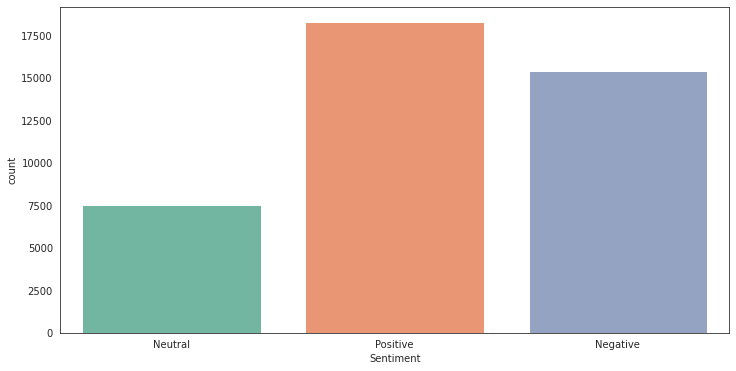

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=df)

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =var1.Sentiment,
    values = var1.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

### **Most Common Words**

In [ ]:
df['temp_list'] = df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']

In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [ ]:
# Tree of the most common words
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

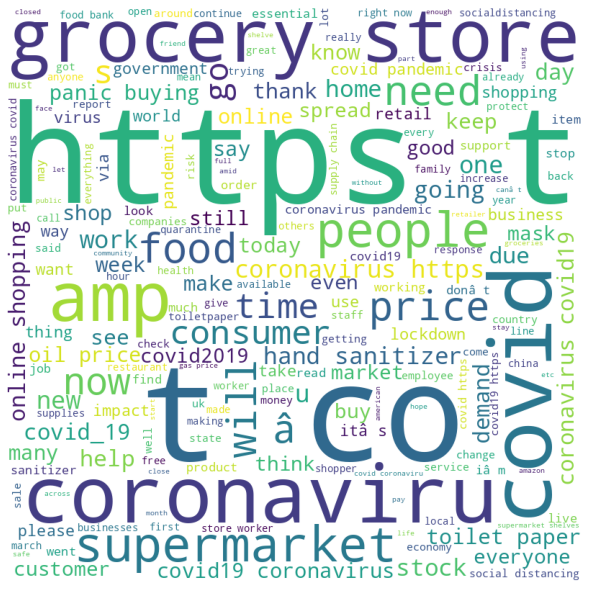

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

**Positive Wordcloud**

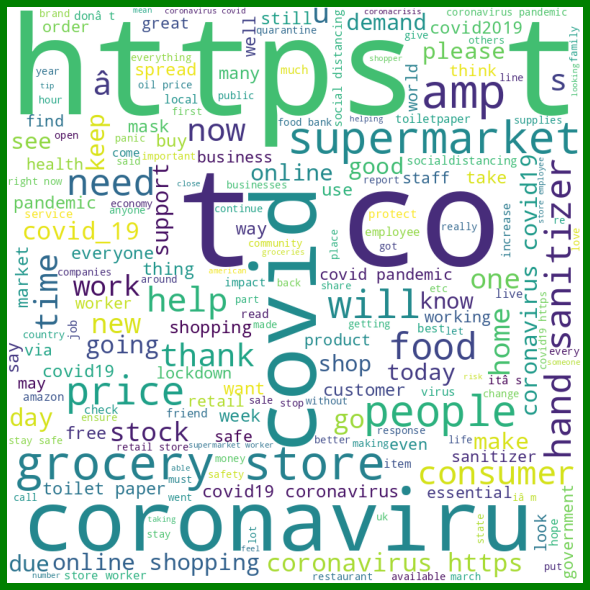

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_positive = df[df["Sentiment"]== "Positive"] 
# iterate through the csv file 
for val in df_positive.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "green") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

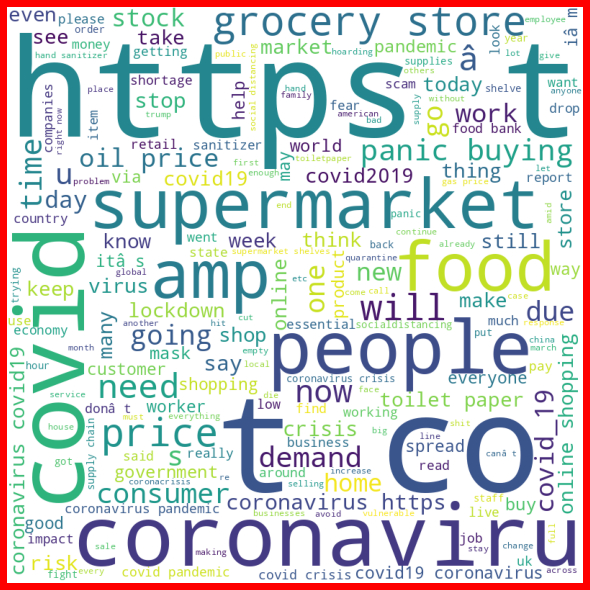

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_negative = df[df["Sentiment"]== "Negative"] 
# iterate through the csv file 
for val in df_negative.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "red") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

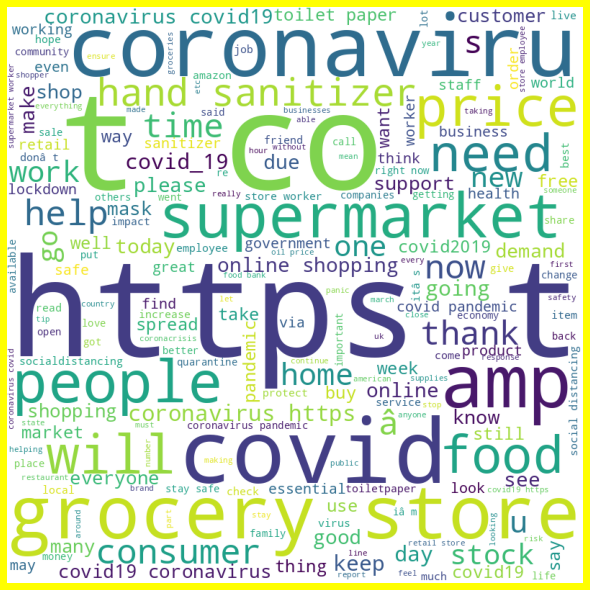

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
df_neutral = df[df["Sentiment"]== "Neutral"] 
# iterate through the csv file 
for val in df_positive.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "yellow") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## **6. TextBlob Model**



In [ ]:
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob, Word, Blobber

In [ ]:
tweet = "I would love to watch the magic show again"
TextBlob(tweet).sentiment 

Sentiment(polarity=0.5, subjectivity=0.8)

***The above output shows that the polarity of the sentence is 0.7, indicating that the sentiment is positive. Polarity is of 'float' type and lies in the range of -1,1, where 1 means a high positive sentiment, and -1 means a high negative sentiment.***

***The output also prints subjectivity of the text which is 0.825 in our example.*** ***Subjectivity is also of 'float' type and lies in the range of 0,1.***
***The value closer to 1 indicates that the sentence is mostly a public opinion and not a factual piece of information and vice versa.***

In [ ]:
# Applying on dataset
df['TB_score']= df.text.apply(lambda x: TextBlob(x).sentiment)
df.head()

,User_name,Time,Location,text,description_lengths,scores,compound,Sentiment,temp_list,TB_score
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[@MeNyrbie, @Phil_Gahan, @Chrisitv, https://t....","(0.0, 0.0)"
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500,Positive,"[advice, Talk, to, your, neighbours, family, t...","(0.16666666666666666, 0.20512820512820512)"
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,Positive,"[Coronavirus, Australia:, Woolworths, to, give...","(-0.2, 0.3)"
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com...",0.8456,Positive,"[My, food, stock, is, not, the, only, one, whi...","(0.20000000000000004, 0.625)"
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co...",0.5382,Positive,"[Me,, ready, to, go, at, supermarket, during, ...","(-0.07777777777777777, 0.5555555555555555)"


In [ ]:
df['TB_sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment[0])
df.head()

,User_name,Time,Location,text,description_lengths,scores,compound,Sentiment,temp_list,TB_score,TB_sentiment
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[@MeNyrbie, @Phil_Gahan, @Chrisitv, https://t....","(0.0, 0.0)",0.000000
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500,Positive,"[advice, Talk, to, your, neighbours, family, t...","(0.16666666666666666, 0.20512820512820512)",0.166667
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,Positive,"[Coronavirus, Australia:, Woolworths, to, give...","(-0.2, 0.3)",-0.200000
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com...",0.8456,Positive,"[My, food, stock, is, not, the, only, one, whi...","(0.20000000000000004, 0.625)",0.200000
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co...",0.5382,Positive,"[Me,, ready, to, go, at, supermarket, during, ...","(-0.07777777777777777, 0.5555555555555555)",-0.077778


## **7. Emotions in text**



**Getting emotions using NCR Emotion lexicon**

In [ ]:
!pip install nrclex


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import nltk
#nltk.download('punkt')

In [ ]:
from nrclex import NRCLex

tweet = NRCLex('a good show to  the  team')

#Return affect dictionary
print(tweet.affect_dict)

#Return raw emotional counts
print("\n",tweet.raw_emotion_scores)

#Return highest emotions
print("\n", tweet.top_emotions)

#Return affect frequencies
print("\n",tweet.affect_frequencies)

{'good': ['anticipation', 'joy', 'positive', 'surprise', 'trust'], 'show': ['trust'], 'team': ['trust']}

 {'anticipation': 1, 'joy': 1, 'positive': 1, 'surprise': 1, 'trust': 3}

 [('trust', 0.42857142857142855)]

 {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.42857142857142855, 'surprise': 0.14285714285714285, 'positive': 0.14285714285714285, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.14285714285714285, 'anticipation': 0.14285714285714285}


In [ ]:
text = NRCLex("We are afraid to do it")
# Getting top emotions
print("\n", text.top_emotions)
# Getting the top most emotion
print("\n", text.top_emotions[0][0])
# Getting the top most emotion score
print("\n", text.top_emotions[0][1])


 [('fear', 0.5), ('negative', 0.5)]

 fear

 0.5


In [ ]:
def emotion(x):
    text = NRCLex(x)
    if text.top_emotions[0][1] == 0.0:
        return "No emotion"
    else:
        return text.top_emotions[0][0]
df['Emotion'] = df['text'].apply(emotion)
df.head()

,User_name,Time,Location,text,description_lengths,scores,compound,Sentiment,temp_list,TB_score,TB_sentiment,Emotion
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,"[@MeNyrbie, @Phil_Gahan, @Chrisitv, https://t....","(0.0, 0.0)",0.000000,No emotion
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500,Positive,"[advice, Talk, to, your, neighbours, family, t...","(0.16666666666666666, 0.20512820512820512)",0.166667,positive
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,Positive,"[Coronavirus, Australia:, Woolworths, to, give...","(-0.2, 0.3)",-0.200000,fear
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com...",0.8456,Positive,"[My, food, stock, is, not, the, only, one, whi...","(0.20000000000000004, 0.625)",0.200000,positive
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co...",0.5382,Positive,"[Me,, ready, to, go, at, supermarket, during, ...","(-0.07777777777777777, 0.5555555555555555)",-0.077778,fear


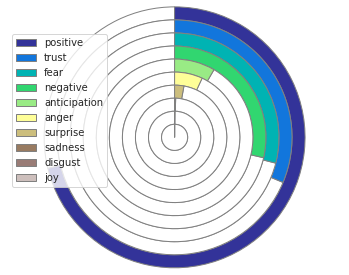

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

df_chart = df[df.Emotion != "No emotion"]
labels = df_chart.Emotion.value_counts().index.tolist()
data = df_chart.Emotion.value_counts()
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "grey")

plt.legend(loc='upper left')
plt.show()

In [ ]:
b = df_chart.Emotion.value_counts().index.tolist()
a = df_chart.Emotion.value_counts(normalize = True).tolist()
row = pd.DataFrame({'scenario' : []})
row["scenario"] = b
row["Percentage"] = a
fig = px.treemap(row, path= ["scenario"], values="Percentage",title='Tree of Emotions')
fig.show()